<a href="https://colab.research.google.com/github/enriqueasegura/Fmethod/blob/master/Stern_Gerlach_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
!pip install git+https://github.com/quantumlib/Cirq
  
import matplotlib.pyplot as plt
from pandas import DataFrame
import cirq
from cirq.ops import CNOT, TOFFOLI
from cirq import Simulator
import random



  Cloning https://github.com/quantumlib/Cirq to /tmp/pip-req-build-upe201ug
    100% |████████████████████████████████| 12.6MB 2.4MB/s 
    100% |████████████████████████████████| 952kB 11.5MB/s 
  Running setup.py bdist_wheel for cirq ... - \ | / done
  Stored in directory: /tmp/pip-ephem-wheel-cache-h1gycp9s/wheels/c9/f4/ee/029123a49c5e2d75d08c2a9f937e207b88f045901db04632a7
Successfully built cirq
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2


(0, 0): ───H───@───M('q0')───
               │
(0, 1): ───────X───M('q1')───

(1, 0): ───H───@───M('q2')───
               │
(1, 1): ───────X───M('q3')───
Counter({1: 503, 0: 497})


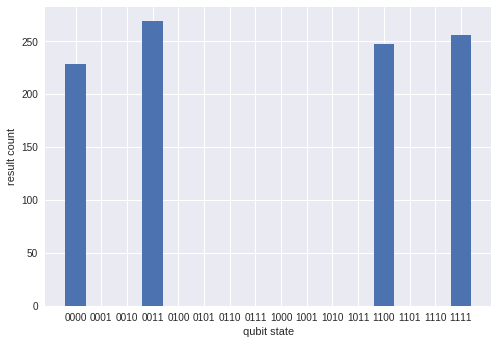

array([228.,   0.,   0., 269.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 247.,   0.,   0., 256.])

In [5]:
from cirq.circuits import InsertStrategy
simulator =  cirq.google.XmonSimulator()

length=2
circuit = cirq.Circuit() 
qubits = [cirq.GridQubit(i, j) for i in range(length) for j in range(length)]

qubits

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.H(qubits[2]),strategy=InsertStrategy.EARLIEST)
circuit.append(cirq.CNOT(qubits[2], qubits[3]),strategy=InsertStrategy.EARLIEST)

circuit.append(cirq.measure(qubits[0], key='q0'))
circuit.append(cirq.measure(qubits[1], key='q1'),strategy=InsertStrategy.EARLIEST)
circuit.append(cirq.measure(qubits[2], key='q2'),strategy=InsertStrategy.EARLIEST)
circuit.append(cirq.measure(qubits[3], key='q3'),strategy=InsertStrategy.EARLIEST)

print(circuit)

results = simulator.run(circuit, repetitions=1000)
print(results.histogram(key='q0'))

cirq.plot_state_histogram(results)

In [0]:
from cirq.circuits import InsertStrategy
simulator =  cirq.google.XmonSimulator()

def stern_gerlach(random_t_parameter):
  length=2
  circuit = cirq.Circuit() 
  qubits = [cirq.GridQubit(i, j) for i in range(length) for j in range(length)]

  circuit.append(cirq.H(qubits[0]))
  variated_T = cirq.ZPowGate(exponent=random_t_parameter)
  circuit.append(variated_T(qubits[0]))
  circuit.append(cirq.H(qubits[0]))


  circuit.append(cirq.measure(qubits[0], key='q0'))
  #print(circuit)
  return(circuit)


def test_stern_gerlach_ml(learning_rate, random_t_parameter):
  
  weight_arr = []
  loss_arr =[]
  grad_arr =[]
  
  weight_arr.append(random_t_parameter)
  
  status = 'not done'
  count =1
  while status == 'not done':
    #get results
    #print('current count: ', count)
    #print('current weight:', random_t_parameter)
    
    dummy_sg = stern_gerlach(random_t_parameter)
    
    results = simulator.run(dummy_sg, repetitions=10000)
  
    s_k, s_v= zip(*results.measurements.items())
  
  
    current_state_values = 1 - 2*np.array(s_v).astype(np.int32)
  
    current_predicted_label_value = np.mean(current_state_values)
  
    current_loss_value = 1 - np.square(current_predicted_label_value)
    #print('current loss: ', current_loss_value)
    loss_arr.append(current_loss_value)
    
    current_gradient_value = 2*current_predicted_label_value
  
    current_grad_square = np.square(current_gradient_value)
    grad_arr.append(current_gradient_value)
    if np.abs(current_loss_value) > 1e-8:
      random_t_parameter = random_t_parameter - learning_rate * (current_loss_value)*current_gradient_value/(current_grad_square)
      #print('next weight: ', random_t_parameter)
      weight_arr.append(random_t_parameter)
      count = count+1
    else:
      status = 'done'
      print(status)
      print('final weight: ',weight_arr[-1])
      cirq.plot_state_histogram(results)
      
  return(weight_arr, loss_arr, grad_arr)


def test_stern_gerlach_ml_algebra(learning_rate, random_t_parameter):
  
  weight_arr = []
  loss_arr =[]
  grad_arr =[]
  
  weight_arr.append(random_t_parameter)
  
  expect_arr =[]
  
  status = 'not done'
  count =1
  while status == 'not done':
    #get results
    #print('current count: ', count)
    #print('current weight:', random_t_parameter)
    
    dummy_sg = stern_gerlach(random_t_parameter)
    
    results = simulator.run(dummy_sg, repetitions=10000)
  
    s_k, s_v= zip(*results.measurements.items())
  
  
    current_state_values = 1 - 2*np.array(s_v).astype(np.int32)
  
    current_predicted_label_value = np.mean(current_state_values)
  
    current_loss_value = 1 - np.square(current_predicted_label_value)
    #print('current loss: ', current_loss_value)
    loss_arr.append(current_loss_value)
    
    current_gradient_value = 2*current_predicted_label_value
    grad_arr.append(current_gradient_value)
  
    current_grad_square = np.square(current_gradient_value)
    
    expectation_value = (1/current_predicted_label_value) - current_predicted_label_value
    expect_arr.append(expectation_value)
    
    if np.abs(current_loss_value) > 1e-8:
      random_t_parameter = random_t_parameter - 0.5*learning_rate *expectation_value
      #print('next weight: ', random_t_parameter)
      weight_arr.append(random_t_parameter)
      count = count+1
    else:
      status = 'done'
      print(status)
      print('final weight: ',weight_arr[-1])
      cirq.plot_state_histogram(results)
      
  return(weight_arr, loss_arr, expect_arr, grad_arr)



def test_stern_gerlach_ml_adaptive(learning_rate, random_t_parameter):
  
  weight_arr = []
  loss_arr =[]
  grad_arr =[]
  
  weight_arr.append(random_t_parameter)
  
  expect_arr =[]
  learn_arr =[]
  
  status = 'not done'
  count =1
  current_grad_memory =0
  while status == 'not done':
    #get results
    #print('current count: ', count)
    #print('current weight:', random_t_parameter)
    
    dummy_sg = stern_gerlach(random_t_parameter)
    
    results = simulator.run(dummy_sg, repetitions=10000)
  
    s_k, s_v= zip(*results.measurements.items())
  
  
    current_state_values = 1 - 2*np.array(s_v).astype(np.int32)
  
    current_predicted_label_value = np.mean(current_state_values)
  
    current_loss_value = 1 - np.square(current_predicted_label_value)
    #print('current loss: ', current_loss_value)
    loss_arr.append(current_loss_value)
    
    current_gradient_value = 2*current_predicted_label_value
    grad_arr.append(current_gradient_value)
  
    current_grad_square = np.square(current_gradient_value)
    
    current_grad_memory += current_grad_square
    if np.abs(current_loss_value) > 1e-8:
      
      adjusted_learning_rate = learning_rate / np.sqrt(current_grad_memory + 1e-8)
      learn_arr.append(adjusted_learning_rate)
      
      random_t_parameter = random_t_parameter - adjusted_learning_rate * current_gradient_value
      #print('next weight: ', random_t_parameter)
      weight_arr.append(random_t_parameter)
      
      
      
      count = count+1
    else:
      status = 'done'
      print(status)
      print('final weight: ',weight_arr[-1])
      cirq.plot_state_histogram(results)
      
  return(weight_arr, loss_arr, learn_arr, grad_arr)




seed value and Process SGD:  0.5
done
final weight:  0.9822787018516224


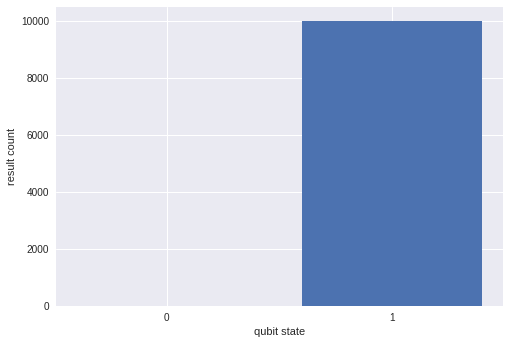

seed value and Process AdaGard:  0.5
done
final weight:  0.9885573875688942


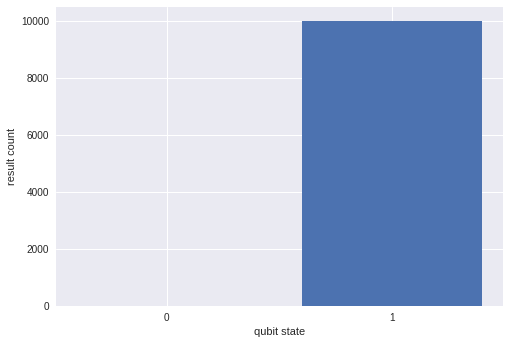

weight regular sgd:  0.9822787018516224
weight adagard:  0.9885573875688942
Counter({1: 9988, 0: 12})


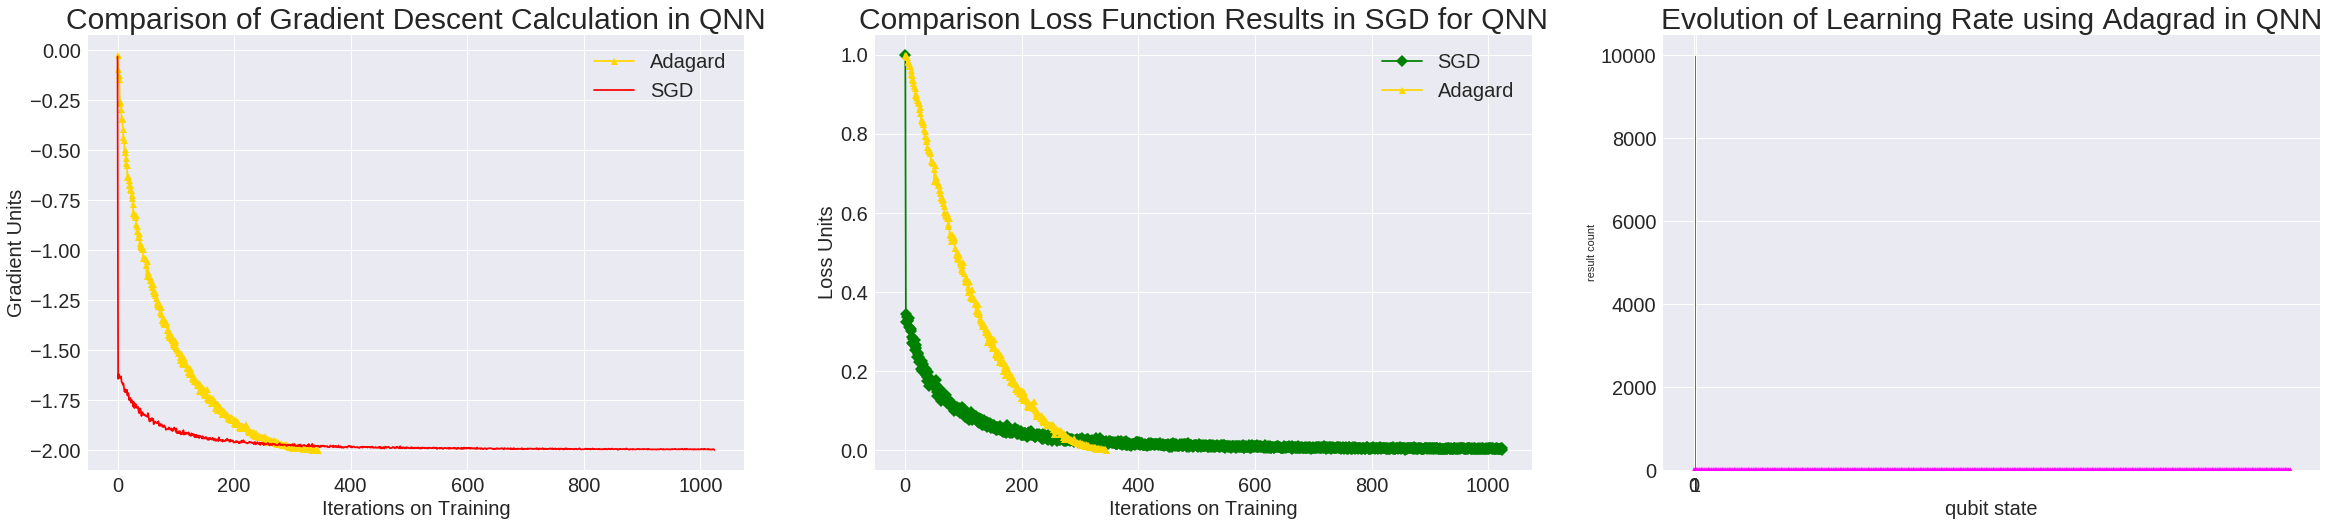

Counter({1: 9996, 0: 4})


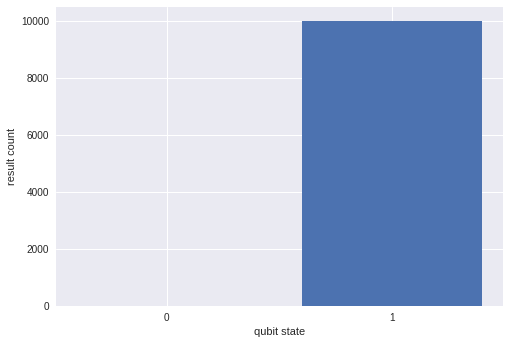

array([4.000e+00, 9.996e+03])

In [41]:
import numpy as np

random_t_parameter =  0.5

print('seed value and Process SGD: ', random_t_parameter)

sample = test_stern_gerlach_ml(0.01, random_t_parameter)

#sample_me = test_stern_gerlach_ml_algebra(0.01, random_t_parameter)

print('seed value and Process AdaGard: ', random_t_parameter)
sample_adagard = test_stern_gerlach_ml_adaptive(0.01, random_t_parameter)

plt.figure(figsize=(40,8))
plt.subplot(131)
#plt.plot(sample_me[2], label ='my version', color='red',marker='o')
#plt.plot(sample_me[3], label = 'the paper', color='green', marker ='D')
plt.plot(sample_adagard[3], color='gold', label = 'Adagard', marker = '^')
plt.plot(sample[2], color ='red', label = 'SGD')

plt.ylabel('Gradient Units', fontsize=20)
plt.xlabel('Iterations on Training', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.title('Comparison of Gradient Descent Calculation in QNN', fontsize=30)
plt.tick_params(labelsize=20)

plt.subplot(132)


plt.plot(sample[1], color ='green', marker = 'D', markersize=8, label='SGD')
plt.ylabel('Loss Units', fontsize=20)
plt.xlabel('Iterations on Training', fontsize=20)
plt.title('Comparison Loss Function Results in SGD for QNN', fontsize=30)
plt.tick_params(labelsize=20)
#plt.plot(sample_me[1], color = 'red', marker ='o', markevery=100, markersize=5, label ='my version')
plt.plot(sample_adagard[1], color='gold', label = 'Adagard', marker = '^')
plt.legend(loc='best', fontsize=20)

plt.subplot(133)
plt.plot(sample_adagard[2], color ='magenta', marker='^')
plt.xlabel('Iterations on Training', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.title('Evolution of Learning Rate using Adagrad in QNN', fontsize=30)

plt.tick_params(labelsize=20)

print('weight regular sgd: ', sample[0][-1])
#print('weight my sgd: ', sample_me[0][-1])
print('weight adagard: ', sample_adagard[0][-1])

dummy_sg = stern_gerlach(1*sample[0][-1])

results = simulator.run(dummy_sg, repetitions=10000)
print(results.histogram(key='q0'))

cirq.plot_state_histogram(results)

dummy_sg_adagard = stern_gerlach(1*sample_adagard[0][-1])

results_adagard = simulator.run(dummy_sg_adagard, repetitions=10000)
print(results_adagard.histogram(key='q0'))

cirq.plot_state_histogram(results_adagard)

In [0]:
simulator =  cirq.google.XmonSimulator()



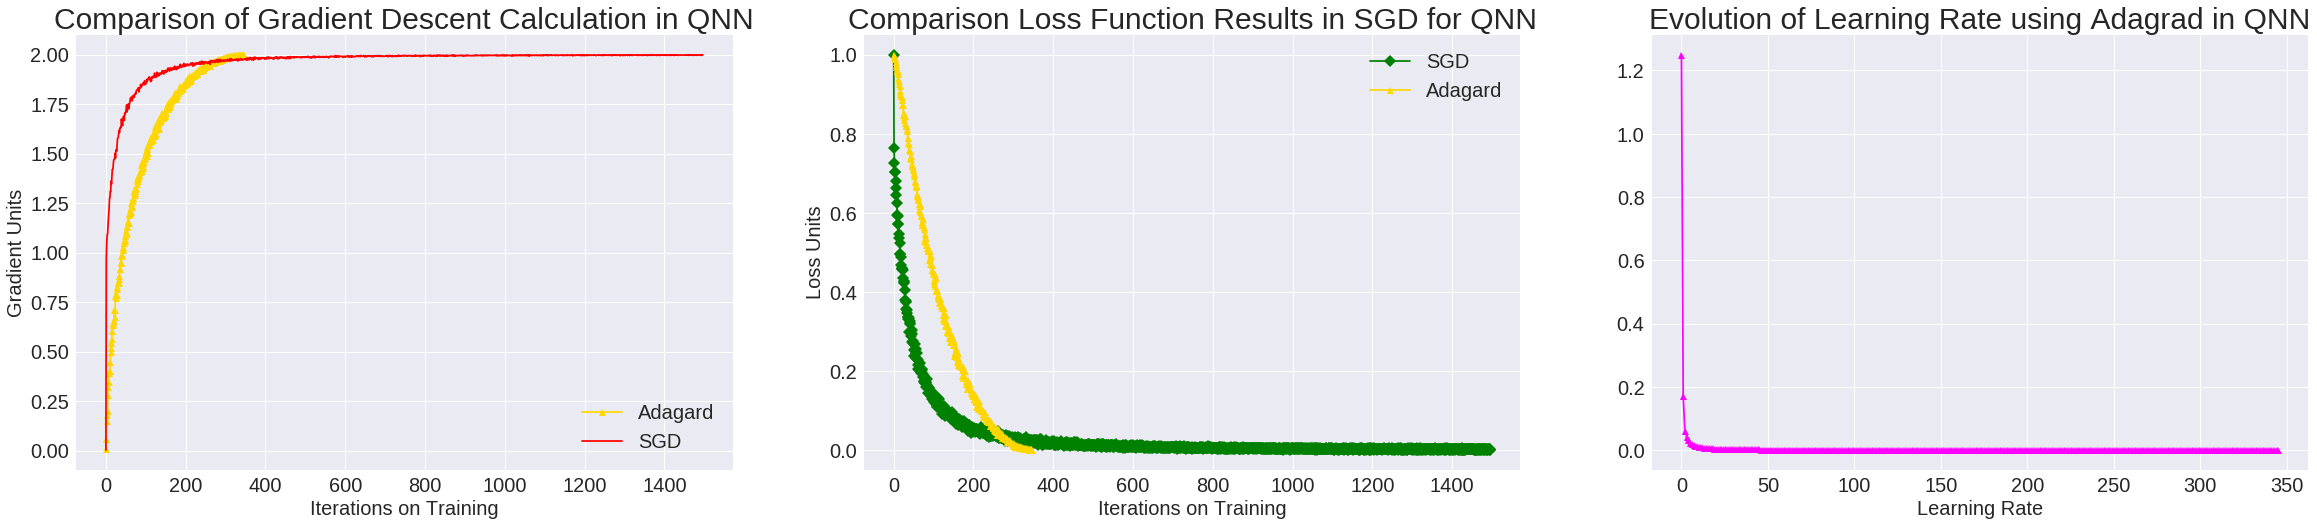

In [37]:
plt.figure(figsize=(40,8))
plt.subplot(131)
#plt.plot(sample_me[2], label ='my version', color='red',marker='o')
#plt.plot(sample_me[3], label = 'the paper', color='green', marker ='D')
plt.plot(sample_adagard[3], color='gold', label = 'Adagard', marker = '^')
plt.plot(sample[2], color ='red', label = 'SGD')

plt.ylabel('Gradient Units', fontsize=20)
plt.xlabel('Iterations on Training', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.title('Comparison of Gradient Descent Calculation in QNN', fontsize=30)
plt.tick_params(labelsize=20)

plt.subplot(132)


plt.plot(sample[1], color ='green', marker = 'D', markersize=8, label='SGD')
plt.ylabel('Loss Units', fontsize=20)
plt.xlabel('Iterations on Training', fontsize=20)
plt.title('Comparison Loss Function Results in SGD for QNN', fontsize=30)
plt.tick_params(labelsize=20)
#plt.plot(sample_me[1], color = 'red', marker ='o', markevery=100, markersize=5, label ='my version')
plt.plot(sample_adagard[1], color='gold', label = 'Adagard', marker = '^')
plt.legend(loc='best', fontsize=20)

plt.subplot(133)
plt.plot(sample_adagard[2], color ='magenta', marker='^')
plt.xlabel('Iterations on Training', fontsize=20)
plt.xlabel('Learning Rate', fontsize=20)
plt.title('Evolution of Learning Rate using Adagrad in QNN', fontsize=30)

plt.tick_params(labelsize=20)

In [35]:
print('weight regular sgd: ', sample[0][-1])
#print('weight my sgd: ', sample_me[0][-1])
print('weight adagard: ', sample_adagard[0][-1])

weight regular sgd:  -3.9871243210810974
weight adagard:  0.009015902086188073


Counter({0: 10000})


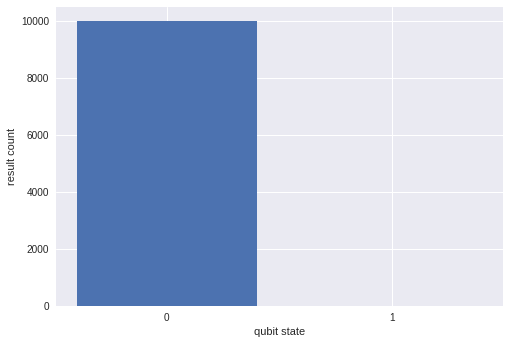

Counter({0: 9998, 1: 2})


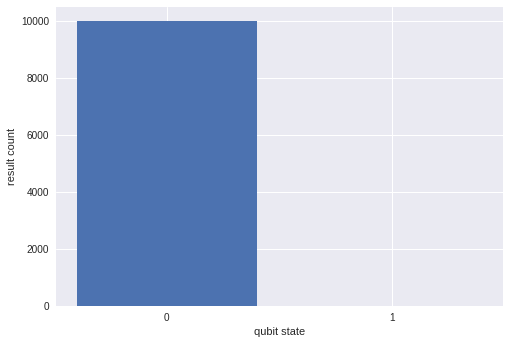

array([9.998e+03, 2.000e+00])

In [34]:
dummy_sg = stern_gerlach(1*sample[0][-1])

results = simulator.run(dummy_sg, repetitions=10000)
print(results.histogram(key='q0'))

cirq.plot_state_histogram(results)

dummy_sg_adagard = stern_gerlach(1*sample_adagard[0][-1])

results_adagard = simulator.run(dummy_sg_adagard, repetitions=10000)
print(results_adagard.histogram(key='q0'))

cirq.plot_state_histogram(results_adagard)

TypeError: ignored